In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# Read the data
df1 = pd.read_csv("C:\\Users\\Suyash Tiwari\\Dropbox\\PC\\Downloads\\New folder\\AirPassengers.csv")

In [10]:
df1

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [11]:
# Check data types
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [13]:
# We are providing inputs to tell pandas that we are trying to work with time series
df1 = pd.read_csv("C:\\Users\\Suyash Tiwari\\Dropbox\\PC\\Downloads\\New folder\\AirPassengers.csv", parse_dates = ['Month'])

In [14]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [15]:
df1

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [17]:
# It is recommended that we make our time series reference as the index
df1 = pd.read_csv("C:\\Users\\Suyash Tiwari\\Dropbox\\PC\\Downloads\\New folder\\AirPassengers.csv", parse_dates = ['Month'], index_col = 'Month')

In [18]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
# We can conveniently do slicing i.e. obtain data for a specific time periods
df1['1951-04-01':'1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [20]:
# We can check values corresponding to a specific time point 
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

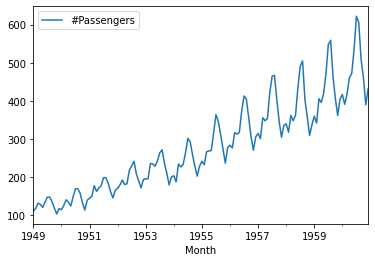

In [23]:
# Plot the time series
df1.plot()
plt.show()

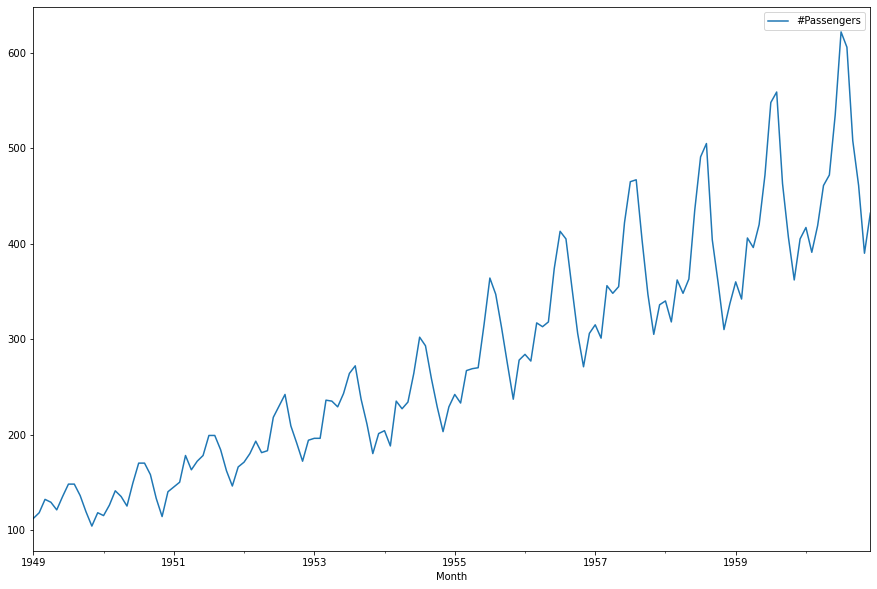

In [27]:
# Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
df1.plot()
plt.show()

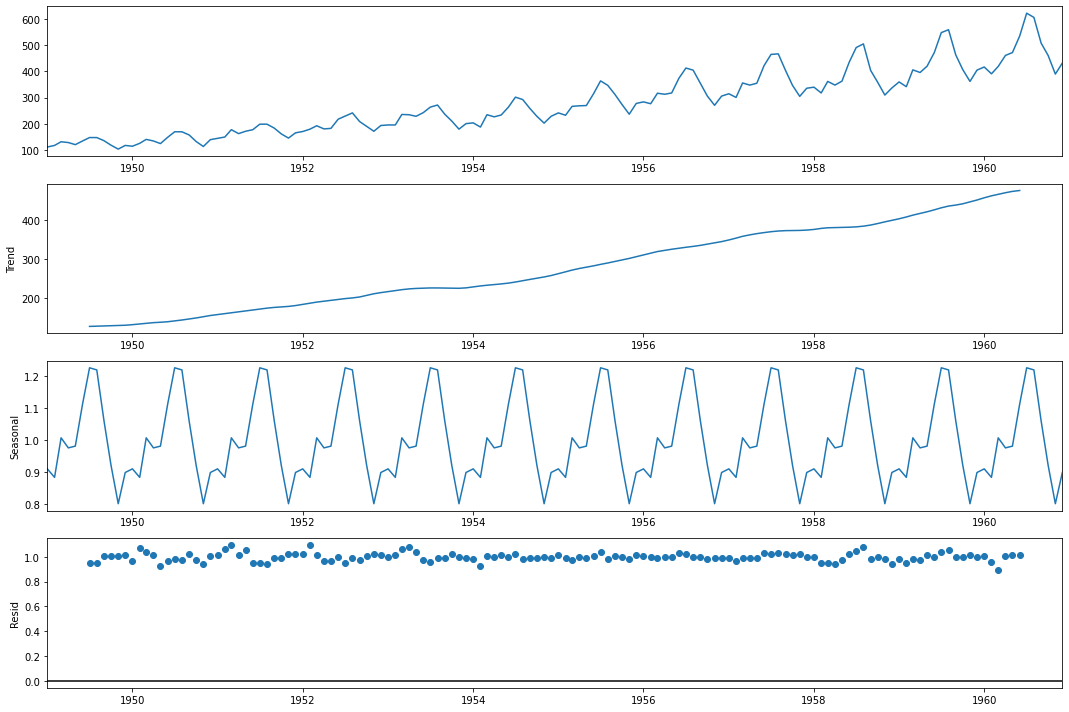

In [29]:
# Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [30]:
# Let's try to do log transformation 
df1_log = df1.copy()

In [37]:
df1_log['Passengers'] = np.log(df1)

In [38]:
df1_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

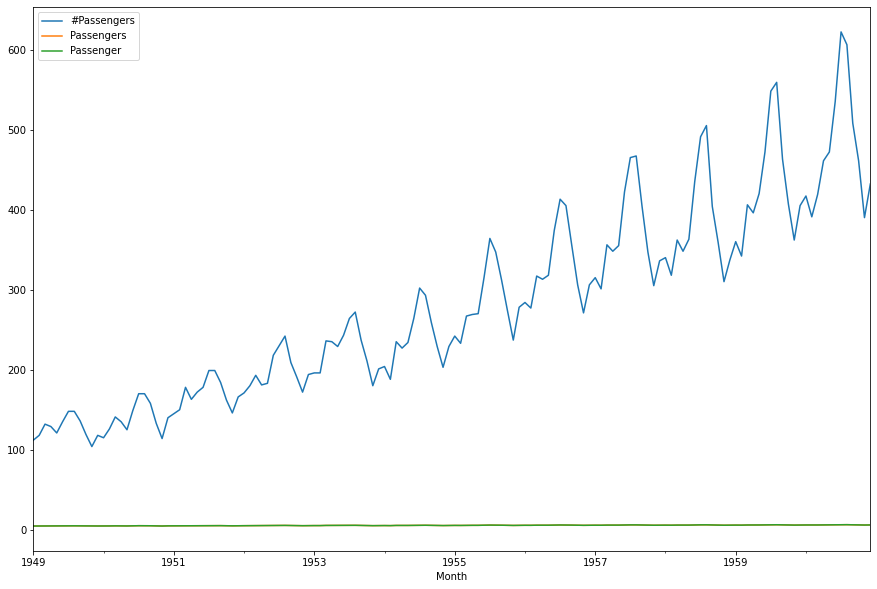

In [39]:
# Visualization the log transformation series
df1_log.plot()
plt.show()

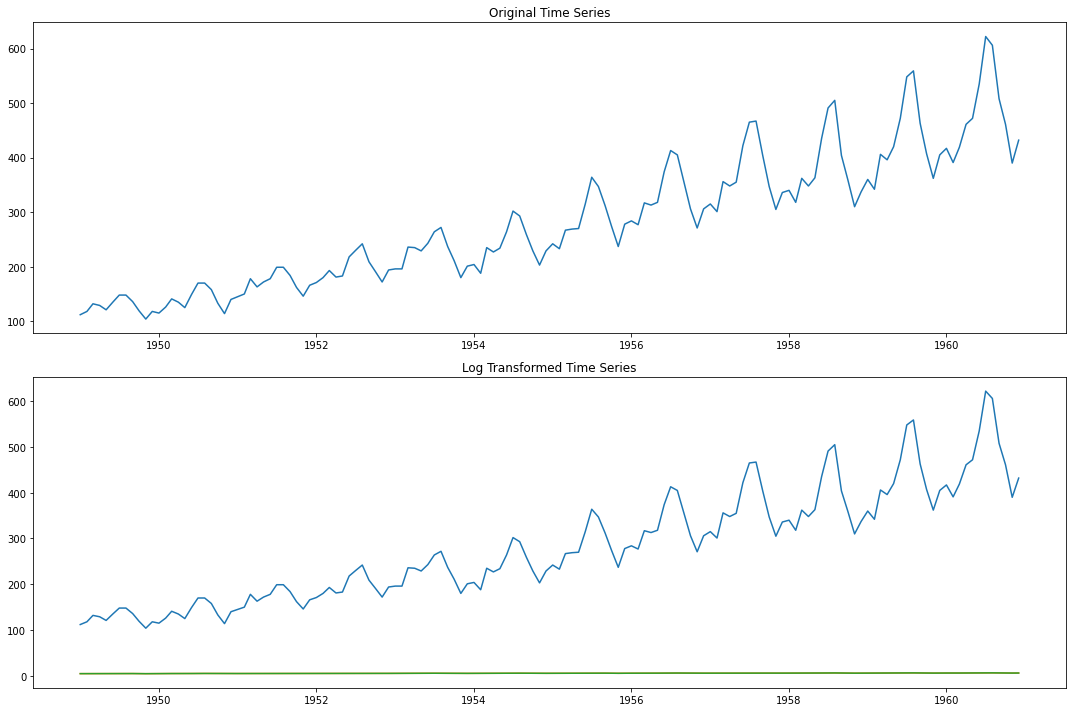

In [40]:
# Compare with the original series 
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()